In [373]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
sns.set_style("whitegrid")
from pprint import pprint
import sqlite3
import yaml
import math
import re
from datetime import datetime
from datetime import timezone
import maya
from collections import Counter
from glob import glob
from ast import literal_eval
import sys
import json
import cProfile
import time
from collections import OrderedDict
from sklearn.preprocessing import StandardScaler
from scipy import spatial
import matplotlib.patches as mpatches

try: # for pip >= 10
    from pip._internal.req import parse_requirements
except ImportError: # for pip <= 9.0.3
    from pip.req import parse_requirements

from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA

import networkx as nx
import networkx.algorithms.community as nxcom

import bokeh.io
from bokeh.io import output_file, show
from bokeh.resources import INLINE
from bokeh.models import (BoxSelectTool, Circle, EdgesAndLinkedNodes, HoverTool,
                          MultiLine, NodesAndLinkedEdges, Plot, Range1d, TapTool,
                         BoxZoomTool, ResetTool, OpenURL, CustomJS, Column, SaveTool)
from bokeh.palettes import Spectral4
from bokeh.plotting import figure, output_notebook
from bokeh.models.graphs import from_networkx
from bokeh.models import TextInput, Button

from scipy.spatial.distance import cosine

import pandas as pd
import plotly
import plotly.graph_objs as go
import plotly.express as px

#%matplotlib inline

# Code for hiding seaborn warnings
import warnings
warnings.filterwarnings("ignore")

In [71]:
f = open("Simulation_Data12.txt").read().split("\n")
f

["['lru_c']",
 'big',
 '[-1, 2000, -1]',
 'True',
 '0.7',
 '0',
 '-0.06821295025996543',
 '-0.6489540621975425',
 '[5008994.408]',
 '[857939.830462982]',
 '[0.6839]',
 '[1241.692]',
 "['lru_c']",
 '[67.14093518257141]',
 'a',
 'B',
 'A',
 '1200',
 'False',
 '1.3191486782038848',
 '0.6330375425649708',
 'A',
 '',
 "['lru_c']",
 'big',
 '[-1, 4000, -1]',
 'True',
 '0.7',
 '0.022115445355485652',
 '-0.5163430166978702',
 '2.045276891712799',
 '[3052845.472]',
 '[455276.3965380611]',
 '[0.8361666666666666]',
 '[3733.344]',
 "['lru_c']",
 '[44.7695095539093]',
 'b',
 'B',
 'A',
 '2400',
 'True',
 '1.536128056243424',
 '-0.4260524712714755',
 'B',
 '',
 "['lru_c']",
 'big',
 '[-1, 6000, -1]',
 'True',
 '0.7',
 '2.164340432099065',
 '0.442059751690133',
 '0.5214445505710613',
 '[2344395.928]',
 '[341741.26284246286]',
 '[0.8757833333333334]',
 '[5723.54]',
 "['lru_c']",
 '[37.26607418060303]',
 'b',
 'A',
 'A',
 '2400',
 'True',
 '-0.3255488033233711',
 '0.20098380789826792',
 'C',
 '',
 "['l

In [346]:
files, rowlen = [], []

#files.append(open("Simulation_Data10.txt").read().split("\n"))
#rowlen.append(22)
#files.append(open("Simulation_Data11.txt").read().split("\n"))
#rowlen.append(22)
files.append(open("Simulation_Data12.txt").read().split("\n"))
rowlen.append(22)


df = pd.DataFrame(columns=['type', 'data', 'container size', 'cache size constraint', 'capacity', 'version', 
                           'alpha', 'xtra_vers', 'xtra_stat1', 'xtra_dynamic', 'total_size', 
                           'total_time', 'hitrate', 'cache_size', 'names', 'runtime', 
                           'stat_version', 'heuristic_ct', 'heuristic_cache', 'cache_safe', 'lru_combine',
                           'xtra_size', 'xtra_time', 'cache_combine'])

for ijk in np.arange(len(files)):
    
    f = files[ijk]
    rl = rowlen[ijk]
    
    total_index = 0
    total_limit = len(f)

    while True:
        i = 0
        l1, l2, l3, l4 = [], [], [], []

        num_type = len(literal_eval(f[0]))
        while i < rl:

            # Constraints get a special case
            if i == 2:
                constraints = literal_eval(f[i])
                for j in np.arange(3):
                    val = constraints[j]
                    l1.append(val)
                    l2.append(val)
                    l3.append(val)
                    l4.append(val)
            # List format
            elif f[i][0] == '[':
                entry = literal_eval(f[i])

                l1.append(entry[0])
                if (num_type >= 2):
                    l2.append(entry[1])
                    if (num_type >= 3):
                        l3.append(entry[2])
                        if (num_type >= 4):
                            l4.append(entry[3])

            # Non-list format
            else:
                val = f[i]
                try:
                    val = float(val)
                except:
                    pass
                l1.append(val)
                l2.append(val)
                l3.append(val)
                l4.append(val)

            i += 1
            total_index += 1
        
        if rl == 14:
            l1.extend(["a", "", "", ""])
            l2.extend(["a", "", "", ""])
            l3.extend(["a", "", "", ""])
            l4.extend(["a", "", "", ""])

        s1 = pd.Series(l1, index = df.columns)
        df = df.append(s1, ignore_index=True)
        if (num_type >= 2):
            s2 = pd.Series(l2, index = df.columns)
            df = df.append(s2, ignore_index=True)
            if (num_type >= 3):
                s3 = pd.Series(l3, index = df.columns)
                df = df.append(s3, ignore_index=True)
                if (num_type >= 4):
                    s4 = pd.Series(l4, index = df.columns)
                    df = df.append(s4, ignore_index=True)

        if (total_index == total_limit):
            break
            

        while (f[i] == ''):
            i += 1
            total_index += 1
            if (total_index == total_limit):
                break

        if (total_index == total_limit):
            break

        f = f[i:]
    
df["runtime hrs"] = df["runtime"] / 60 / 60

df = df.drop_duplicates(subset=['type', 'data', 'container size', 'cache size constraint', 'capacity',
       'version', 'alpha', 'xtra_vers', 'xtra_stat1', 'xtra_dynamic',
       'total_size', 'total_time', 'hitrate', 'cache_size', 'names',
       'stat_version', 'heuristic_ct', 'heuristic_cache', 'cache_safe', 'lru_combine',
        'xtra_size', 'xtra_time'])

df["protection"] = df["cache_safe"] / df["cache size constraint"]
xtra_list = ["xtra_vers", "xtra_stat1", "xtra_dynamic", "xtra_size", "xtra_time"]
df["stat_version"] = df.stat_version.where(df.xtra_stat1 != 0, "")
df["majority metric"] = df[xtra_list].idxmax(axis=1)


In [347]:
def conditions(df):
    if (df.xtra_vers == 0 and df.xtra_stat1 == 0 and df.xtra_dynamic == 0 and df.xtra_size == 0 and
         df.xtra_time == 0):
        return "None"
    else:
        return df["majority metric"]
    
df["majority metric"] = df.apply(conditions, axis=1)

In [348]:
df

,type,data,container size,cache size constraint,capacity,version,alpha,xtra_vers,xtra_stat1,xtra_dynamic,...,heuristic_ct,heuristic_cache,cache_safe,lru_combine,xtra_size,xtra_time,cache_combine,runtime hrs,protection,majority metric
0,lru_c,big,-1,2000,-1,True,0.7,0.000000,-0.068213,-0.648954,...,B,A,1200.0,False,1.319149,0.633038,A,0.018650,0.6,xtra_size
1,lru_c,big,-1,4000,-1,True,0.7,0.022115,-0.516343,2.045277,...,B,A,2400.0,True,1.536128,-0.426052,B,0.012436,0.6,xtra_dynamic
2,lru_c,big,-1,6000,-1,True,0.7,2.164340,0.442060,0.521445,...,A,A,2400.0,True,-0.325549,0.200984,C,0.010352,0.4,xtra_vers
3,lru_c,big,-1,8000,-1,True,0.7,-1.381794,0.346586,0.000000,...,C,A,3200.0,False,1.410622,0.276142,C,0.008765,0.4,xtra_size
4,lru_c,big,-1,10000,-1,True,0.7,0.194185,-1.953188,0.478063,...,A,A,6000.0,True,1.242840,0.039934,C,0.009117,0.6,xtra_size
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,lru_c,big,-1,2000,-1,True,0.7,0.000000,-1.670295,0.941917,...,A,A,800.0,True,0.768607,0.450878,A,0.019830,0.4,xtra_dynamic
1496,lru_c,big,-1,4000,-1,True,0.7,0.512227,-1.075940,0.545867,...,C,A,1600.0,True,1.228390,0.669807,B,0.012992,0.4,xtra_size
1497,lru_c,big,-1,6000,-1,True,0.7,-1.058269,-0.092519,-1.403071,...,C,A,1200.0,True,-0.087174,-0.331566,A,0.012782,0.2,xtra_size
1498,lru_c,big,-1,8000,-1,True,0.7,2.383651,0.000000,2.507072,...,A,A,6400.0,True,0.521516,0.358763,B,0.010408,0.8,xtra_dynamic


# Functions

In [75]:
def run_plot(df, xd, yd, flds):
    # CREATE NEW COLUMN OF CONCATENATED VALUES
    df['_'.join(flds)] =  pd.Series(df.reindex(flds, axis='columns')
                                     .astype('str')
                                     .values.tolist()
                                  ).str.join('_')

    # PLOT WITH hue
    sns.relplot(x=xd, y=yd, hue='_'.join(flds), data=df, aspect=1.5)
    plt.show()

    plt.clf()
    plt.close()

In [76]:
# 0s and 1s in xtras only
def binary_extra(vdf):
    vdf = vdf[(vdf["xtra_dynamic"] == 0) | (vdf["xtra_dynamic"] == 1)]
    vdf = vdf[(vdf["xtra_vers"] == 0) | (vdf["xtra_vers"] == 1)]
    vdf = vdf[(vdf["xtra_stat1"] == 0) | (vdf["xtra_stat1"] == 1)]
    return vdf
    
# xtra column is not 0
def nonzero_col(vdf, col):
    vdf = vdf[(vdf[col] != 0)]
    return vdf

# all xtra column is not 0
def no_xtra(vdf):
    for col in ["xtra_vers", "xtra_stat1", "xtra_dynamic", "xtra_size", "xtra_time"]:
        vdf = vdf[(vdf[col] == 0)]
    return vdf

def choose_xtra(df, a, b, c, d, e, f):
    return df[(df["xtra_vers"] == a) & (df["xtra_stat1"] == b) & (df["xtra_dynamic"] == c) & 
            (df["lru_combine"] == d) & (df["xtra_size"] == e) & (df["xtra_time"] == f)]

# base case of 0s
def add_zeros(vdf):
    pass

# filter cache_safe
def cache_safe(vdf, l):
    vdf = vdf[vdf["cache_safe"] == l[0]]
    for i in l[1:]:
        vdf = vdf.append(vdf[vdf["cache_safe"] == i])
    return vdf

In [77]:
stat_df = choose_xtra(df, 0, 0, 1, "False", 0, 0)
stat_df.head()

,type,data,container size,cache size constraint,capacity,version,alpha,xtra_vers,xtra_stat1,xtra_dynamic,...,heuristic_ct,heuristic_cache,cache_safe,lru_combine,xtra_size,xtra_time,cache_combine,runtime hrs,protection,majority metric
225,lru_c,big,-1,2000,-1,True,0.7,0.0,0.0,1.0,...,C,A,0.0,False,0.0,0.0,A,0.039112,0,xtra_dynamic
226,lru_c,big,-1,2000,-1,True,0.7,0.0,0.0,1.0,...,C,A,400.0,False,0.0,0.0,A,0.027370,0.2,xtra_dynamic
227,lru_c,big,-1,2000,-1,True,0.7,0.0,0.0,1.0,...,C,A,800.0,False,0.0,0.0,A,0.021897,0.4,xtra_dynamic
228,lru_c,big,-1,2000,-1,True,0.7,0.0,0.0,1.0,...,C,A,1200.0,False,0.0,0.0,A,0.018950,0.6,xtra_dynamic
229,lru_c,big,-1,2000,-1,True,0.7,0.0,0.0,1.0,...,C,A,1600.0,False,0.0,0.0,A,0.017093,0.8,xtra_dynamic


In [78]:
base_df = no_xtra(df)

In [156]:
base_df[base_df["cache size constraint"] == 10000].iloc[:,:20]

,type,data,container size,cache size constraint,capacity,version,alpha,xtra_vers,xtra_stat1,xtra_dynamic,total_size,total_time,hitrate,cache_size,names,runtime,stat_version,heuristic_ct,heuristic_cache,cache_safe
20,lru_c,big,-1,10000,-1,True,0.7,0.0,0.0,0.0,1699304.932,239455.331718,0.91025,9972.344,lru_c,23.817421,,C,A,0.0
170,lru_c,big,-1,10000,-1,True,0.7,0.0,0.0,0.0,1699304.932,239455.331718,0.91025,9972.344,lru_c,23.866863,,C,A,0.0


In [80]:
stat_df[stat_df["cache size constraint"] == 4000].iloc[:,:20]

,type,data,container size,cache size constraint,capacity,version,alpha,xtra_vers,xtra_stat1,xtra_dynamic,total_size,total_time,hitrate,cache_size,names,runtime,stat_version,heuristic_ct,heuristic_cache,cache_safe
230,lru_c,big,-1,4000,-1,True,0.7,0.0,0.0,1.0,1.014388e+07,2.062737e+06,0.384717,3826.060,lru_c,123.371374,,C,A,0.0
231,lru_c,big,-1,4000,-1,True,0.7,0.0,0.0,1.0,6.323148e+06,1.134434e+06,0.638133,3698.556,lru_c,75.412631,,C,A,800.0
232,lru_c,big,-1,4000,-1,True,0.7,0.0,0.0,1.0,4.664033e+06,7.652925e+05,0.740650,3905.320,lru_c,57.579863,,C,A,1600.0
233,lru_c,big,-1,4000,-1,True,0.7,0.0,0.0,1.0,3.781452e+06,5.973360e+05,0.787550,3041.684,lru_c,49.338435,,C,A,2400.0
234,lru_c,big,-1,4000,-1,True,0.7,0.0,0.0,1.0,3.286069e+06,5.064143e+05,0.815567,3877.224,lru_c,48.542048,,C,A,3200.0


In [81]:
cap_df.sort_values("hitrate")

,type,data,container size,cache size constraint,capacity,version,alpha,xtra_vers,xtra_stat1,xtra_dynamic,...,heuristic_ct,heuristic_cache,cache_safe,lru_combine,xtra_size,xtra_time,cache_combine,runtime hrs,protection,majority metric
321,lru_c,big,-1,10000,-1,True,0.7,0.000000,1.186118,-0.097756,...,B,A,2000.0,True,1.109127,1.174937,A,0.013515,0.2,Popularity
346,lru_c,big,-1,10000,-1,True,0.7,0.966994,0.000000,0.859478,...,B,A,2000.0,True,1.844286,0.000000,A,0.013129,0.2,Size
1064,lru_c,big,-1,10000,-1,True,0.7,1.863266,0.000000,-1.507514,...,C,A,0.0,True,2.353401,0.000000,A,0.013629,0.0,Size
371,lru_c,big,-1,10000,-1,True,0.7,0.000000,0.000000,-0.968630,...,B,A,2000.0,True,1.671432,0.000000,A,0.012091,0.2,Size
1040,lru_c,big,-1,10000,-1,True,0.7,0.129662,-0.951995,0.506156,...,B,A,2000.0,True,-0.426592,1.824237,A,0.012420,0.2,Time
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,lru_c,big,-1,10000,-1,True,0.7,0.273671,0.306929,0.052699,...,B,A,2000.0,True,-1.173414,0.521409,A,0.009281,0.2,Time
721,lru_c,big,-1,10000,-1,True,0.7,0.000000,-1.142328,2.005511,...,A,A,2000.0,True,-0.096477,-0.796826,A,0.008998,0.2,Dynamic Count
1343,lru_c,big,-1,10000,-1,True,0.7,1.142370,-0.565060,0.877903,...,A,A,8000.0,True,0.000000,0.000000,A,0.009172,0.8,Version
1240,lru_c,big,-1,10000,-1,True,0.7,0.000000,-0.235844,1.278778,...,A,A,2000.0,True,0.000000,0.000000,A,0.008575,0.2,Dynamic Count


In [248]:
cap_df = df[df["cache size constraint"] == 6000]

#cap_df = cap_df[cap_df["total_size"] < 2400000]

cap_df = cap_df.replace({"xtra_vers":"Version", "xtra_stat1":"Popularity", "xtra_dynamic":"Dynamic Count",
                       "xtra_size":"Size", "xtra_time":"Time", "None":"Baseline LRU"})

fig = px.scatter_3d(x=cap_df["hitrate"],
                    y=cap_df["total_size"],
                    z=cap_df['total_time'],
                    size=cap_df["cache_size"],
                    color=cap_df["majority metric"],
                    labels={
                     "x": "Hitrate",
                    "y":"Total Size",
                        "z":"Total Time"
                     },
                    #symbol=cap_df["protection"].replace(0.0, "x").replace(0.2,"circle-open").replace(0.4, 'diamond-open').replace(0.6, 'square-open').replace(0.8, 'square'),
                    opacity=0.9,
)

fig.write_html("test.html")
plt.savefig('demo.png', transparent=True, bbox_inches='tight', papertype='executive')


fig.show()

<Figure size 432x288 with 0 Axes>

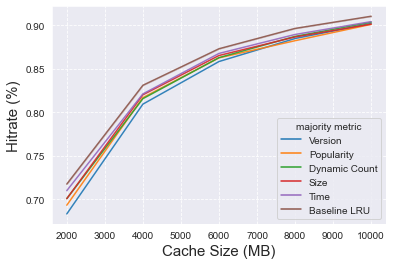

In [237]:
fdf = df[df["lru_combine"] == "False"]

adf = choose_xtra(fdf, 1, 0, 0, "False", 0, 0).groupby("cache size constraint").agg({'total_size': 'mean', 'total_time': 'min', 'hitrate':'max', 'majority metric':'max', 'cache_size':'mean'}).reset_index()
bdf = choose_xtra(fdf, 0, 1, 0, "False", 0, 0).groupby("cache size constraint").agg({'total_size': 'mean', 'total_time': 'min', 'hitrate':'max', 'majority metric':'max', 'cache_size':'mean'}).reset_index()
cdf = choose_xtra(fdf, 0, 0, 1, "False", 0, 0).groupby("cache size constraint").agg({'total_size': 'mean', 'total_time': 'min', 'hitrate':'max', 'majority metric':'max', 'cache_size':'mean'}).reset_index()
ddf = choose_xtra(fdf, 0, 0, 0, "False", 1, 0).groupby("cache size constraint").agg({'total_size': 'mean', 'total_time': 'min', 'hitrate':'max', 'majority metric':'max', 'cache_size':'mean'}).reset_index()
edf = choose_xtra(fdf, 0, 0, 0, "False", 0, 1).groupby("cache size constraint").agg({'total_size': 'mean', 'total_time': 'min', 'hitrate':'max', 'majority metric':'max', 'cache_size':'mean'}).reset_index()
ndf = no_xtra(df)

abcdf = adf.append(bdf, ignore_index=True).append(cdf, ignore_index=True).append(ddf, ignore_index=True).append(edf, ignore_index=True).append(ndf, ignore_index=True)
#abcdf = abcdf[abcdf["cache size constraint"] != 2000]
abcdef = abcdf.replace({"xtra_vers":"Version", "xtra_stat1":"Popularity", "xtra_dynamic":"Dynamic Count",
                       "xtra_size":"Size", "xtra_time":"Time", "None":"Baseline LRU"})
sns.set_style("dark")
p = sns.lineplot(x="cache size constraint", y="hitrate", hue="majority metric", data=abcdef, alpha=0.9)
plt.grid(True,which="both", linestyle='--')
p.set_xlabel("Cache Size (MB)", fontsize = 15)
p.set_ylabel("Hitrate (%)", fontsize = 15)

plt.savefig('demo.png', transparent=True, bbox_inches='tight', papertype='executive')
plt.savefig('demo_grid.png', transparent=True, bbox_inches='tight')





In [380]:
abcdf.groupby("majority metric").agg("mean")[["total_size", "total_time", "hitrate", "cache_size"]]

,total_size,total_time,hitrate,cache_size
majority metric,,,,
None,2.719066e+06,415412.601739,0.846116,5727.354275
xtra_dynamic,5.106582e+06,461009.794025,0.833900,5743.907360
xtra_size,4.901543e+06,443687.374836,0.834707,5530.230720
xtra_stat1,5.647722e+06,468403.951018,0.831097,5759.112320
xtra_time,4.751904e+06,429735.593343,0.838387,5588.246720
xtra_vers,5.885239e+06,483320.750862,0.827470,5705.769600


In [151]:
df[df["cache size constraint"] == 6000].sort_values(["total_size", "total_time", "hitrate"], ascending=[1,1,0]).head(40).iloc[:,:20]

,type,data,container size,cache size constraint,capacity,version,alpha,xtra_vers,xtra_stat1,xtra_dynamic,total_size,total_time,hitrate,cache_size,names,runtime,stat_version,heuristic_ct,heuristic_cache,cache_safe
1055,lru_c,big,-1,2000,-1,True,0.7,0.000000,0.182383,-2.326767,4529331.956,737099.180265,0.726033,1241.692,lru_c,65.944537,b,C,A,1600.0
1370,lru_c,big,-1,2000,-1,True,0.7,0.000000,-0.570429,-1.329621,4569895.696,742808.240687,0.724750,1241.692,lru_c,61.704719,b,C,A,1600.0
340,lru_c,big,-1,2000,-1,True,0.7,-0.499794,-1.465572,-0.210139,4576325.652,724227.762332,0.730267,1341.808,lru_c,63.801954,a,C,A,1600.0
585,lru_c,big,-1,2000,-1,True,0.7,0.000000,-1.218064,1.477850,4594950.188,714260.491146,0.734367,1982.076,lru_c,61.411551,a,B,A,1600.0
990,lru_c,big,-1,2000,-1,True,0.7,0.000000,0.000000,0.000000,4599473.164,736406.357787,0.726950,1241.692,lru_c,34.433939,,B,A,400.0
1200,lru_c,big,-1,2000,-1,True,0.7,-0.627108,0.000000,0.193448,4602669.504,732602.355616,0.727033,1241.692,lru_c,61.363857,,B,A,1600.0
505,lru_c,big,-1,2000,-1,True,0.7,-1.691055,1.099952,0.000000,4610106.224,738470.158177,0.722150,1493.732,lru_c,39.843393,b,B,A,1600.0
1175,lru_c,big,-1,2000,-1,True,0.7,-0.068633,-1.136061,0.895717,4618000.056,712535.161406,0.738883,1262.520,lru_c,60.812194,a,B,A,400.0
1250,lru_c,big,-1,2000,-1,True,0.7,0.711934,-1.505306,0.561369,4623047.076,729798.486529,0.732867,1241.692,lru_c,61.702561,a,B,A,400.0
128,lru_c,big,-1,2000,-1,True,0.7,0.000000,0.000000,0.000000,4628742.780,755277.371115,0.717417,1241.692,lru_c,34.652020,,C,A,1200.0


In [250]:
val = []
kind = []
cap = []
base = []

base_df = no_xtra(df)[no_xtra(df)["protection"] == 0]

for i in [2000, 4000, 6000, 8000, 10000]:
#for i in [10, 25, 50]:
    base_cap = base_df[base_df["cache size constraint"] == i]
    val.append(1 - df[df["cache size constraint"] == i].sort_values(["total_size"], ascending=True).iloc[0]["total_size"] / base_cap["total_size"].iloc[0])
    val.append(1 - df[df["cache size constraint"] == i].sort_values(["total_time"], ascending=True).iloc[0]["total_time"] / base_cap["total_time"].iloc[0])
    val.append((df[df["cache size constraint"] == i].sort_values(["hitrate"], ascending=False).iloc[0]["hitrate"] - base_cap["hitrate"].iloc[0]) / base_cap["hitrate"].iloc[0])
    kind.extend(["Total Size", "Total Time", "Hitrate"])
    cap.extend([i, i, i])
    
cap


[2000,
 2000,
 2000,
 4000,
 4000,
 4000,
 6000,
 6000,
 6000,
 8000,
 8000,
 8000,
 10000,
 10000,
 10000]

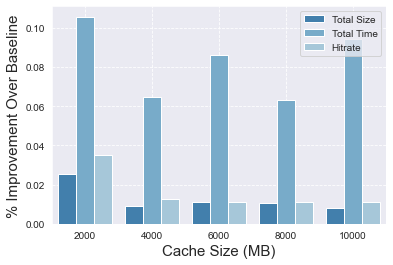

In [293]:
p = sns.barplot(x=cap, y=val, hue=kind, palette="tab20c")
plt.grid(True,which="both", linestyle='--')
p.set_xlabel("Cache Size (MB)", fontsize = 15)
p.set_ylabel("% Improvement Over Baseline", fontsize = 15)

plt.savefig('demo.png', transparent=True, bbox_inches='tight', papertype='executive')

In [88]:
pd.DataFrame(list(zip(kind, val)), 
             columns=["Kind", "Value"]).groupby("Kind").agg("mean")

,Value
Kind,
Hitrate,0.016240
Total Size,0.012940
Total Time,0.082824


In [89]:
ts, tt, hr, cs = [], [], [], []
for i in np.arange(6):
    tempdf = df.loc[[922, 334, 461, 497, 533, 1016]]
    ts.append(1 - tempdf.iloc[i]["total_size"] / base_df.iloc[i]["total_size"])
    tt.append(1 - tempdf.iloc[i]["total_time"] / base_df.iloc[i]["total_time"])
    hr.append((tempdf.iloc[i]["hitrate"] - base_df.iloc[i]["hitrate"]) / base_df.iloc[i]["hitrate"])
    if i == 3:
        cs.append(-0.03)
    else:
        cs.append(1 - tempdf.iloc[i]["cache_size"] / base_df.iloc[i]["cache_size"])
    print(tempdf.iloc[i]["cache_size"], base_df.iloc[i]["cache_size"])

1711.888 1241.692
3794.7920000000004 3889.4759999999997
5939.196000000001 5708.988
9936.424000000003 7826.108000000001
3054.408 9972.344
9888.084 1241.692


In [90]:
val_r = ts + tt + hr + cs
kind_r = []
for i in ["Total Size", "Total Time", "Hitrate", "Cache Size"]:
    kind_r.extend([i,i,i,i,i,i])
cap_r = []
for i in np.arange(4):
    cap_r.extend([5,10,15,25,35,50])

In [91]:
ts

[0.016310480568992758,
 0.007850085659972805,
 -1.114693227165993,
 -0.4125878616277976,
 -0.9601681706882732,
 0.6337891901096439]

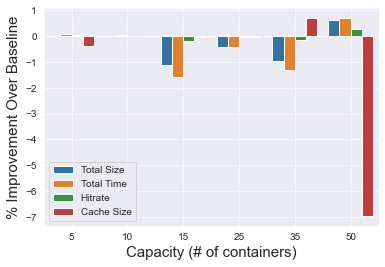

In [92]:

p = sns.barplot(x=cap_r, y=val_r, hue=kind_r)
plt.grid(True,which="both", linestyle='--')
p.set_xlabel("Capacity (# of containers)", fontsize = 15)
p.set_ylabel("% Improvement Over Baseline", fontsize = 15)

plt.savefig('demo.png', transparent=True, bbox_inches='tight', papertype='executive')

In [468]:
np.average(ts), np.average(tt), np.average(hr), np.average(cs)

(0.05187781787245005,
 0.04463987656083077,
 0.007117660703990644,
 -0.026026113866883024)

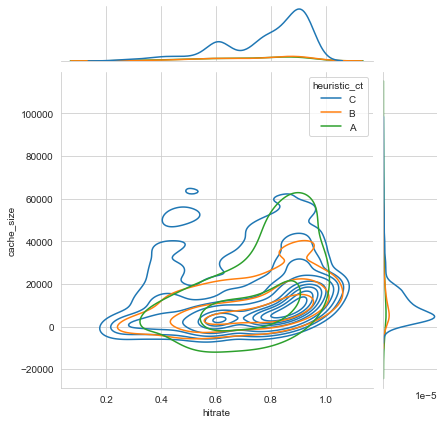

In [469]:
sns.jointplot(x="hitrate", y="cache_size", hue="heuristic_ct", data=df, kind="kde")

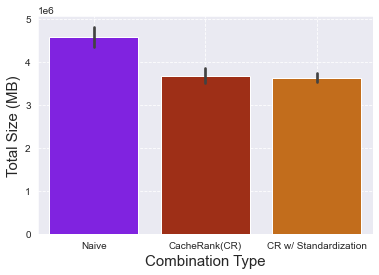

In [290]:
p = sns.barplot(x="heuristic_ct", y="total_size", data=df.sort_values(by="heuristic_ct").replace({"A":"Naive", "B":"CacheRank(CR)", "C":"CR w/ Standardization"}), palette="gnuplot")
plt.grid(True,which="both", linestyle='--')
p.set_xlabel("Combination Type", fontsize = 15)
p.set_ylabel("Total Size (MB)", fontsize = 15)

plt.savefig('demo.png', transparent=True, bbox_inches='tight', papertype='executive')

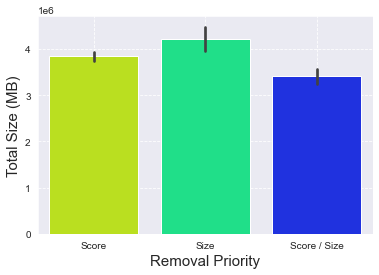

In [287]:
p = sns.barplot(x="cache_combine", y="total_size", data=df.sort_values(by="cache_combine").replace({"A":"Score", "B":"Size", "C":"Score / Size"}), palette="gist_rainbow")
plt.grid(True,which="both", linestyle='--')
p.set_xlabel("Removal Priority", fontsize = 15)
p.set_ylabel("Total Size (MB)", fontsize = 15)

plt.savefig('demo.png', transparent=True, bbox_inches='tight', papertype='executive')

In [349]:
df["heuristic_ct_hm"] = df["heuristic_ct"].replace(["A", "B", "C"], ["Naive", "CacheRank(CR)", "CR w/ Standardization"])
df["cache_combine_hm"] = df["cache_combine"].replace(["A", "B", "C"], ["Score", "Size", "Size + Score"])

df["heuristic_ct_hm"] = df["heuristic_ct_hm"].astype(pd.api.types.CategoricalDtype(categories=["Naive", "CacheRank(CR)", "CR w/ Standardization"]))
#df["cache_combine"] = df["cache_combine"].astype(pd.api.types.CategoricalDtype(categories=["Score", "Size", "Score + Size"]))


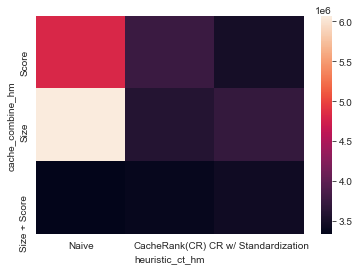

In [355]:
df_m = df[["heuristic_ct_hm", "cache_combine_hm", "total_size"]].groupby(["heuristic_ct_hm", "cache_combine_hm"]).agg("mean").unstack(level=0)


df_m = df_m.xs('total_size',axis=1, drop_level=True)

sns.heatmap(df_m)

plt.savefig('demo.png', transparent=True, bbox_inches='tight', papertype='executive')

In [128]:
df["cache_combine"].value_counts()

C    516
A    508
B    476
Name: cache_combine, dtype: int64

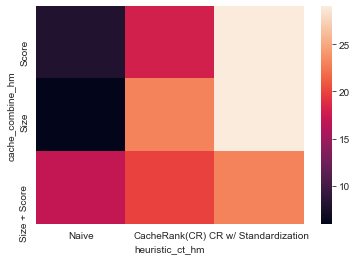

In [358]:
df_gg = df[df["cache size constraint"] == 8000][df["total_size"] < 2342007.376]
df_m = df_gg[["heuristic_ct_hm", "cache_combine_hm", "total_size"]].groupby(["heuristic_ct_hm", "cache_combine_hm"]).agg("count").unstack(level=0)

df_m = df_m.xs('total_size',axis=1, drop_level=True)

sns.heatmap(df_m)

plt.savefig('demo.png', transparent=True, bbox_inches='tight', papertype='executive')

In [51]:
ldf = pd.DataFrame()
for c in np.arange(0, 11000, 2000):
    ldf = ldf.append(df[df["cache size constraint"] == c].sort_values("total_size").iloc[:50])

ldf

,type,data,container size,cache size constraint,capacity,version,alpha,xtra_vers,xtra_stat1,xtra_dynamic,...,heuristic_ct,heuristic_cache,cache_safe,lru_combine,xtra_size,xtra_time,cache_combine,runtime hrs,protection,majority metric
1298,lru_c,big,-1,2000,-1,True,0.7,0.000000,0.000000,-1.089787,...,C,A,1600.0,True,0.000000,0.000000,A,0.015942,0.8,xtra_vers
922,lru_c,big,-1,2000,-1,True,0.7,-0.846492,0.383551,0.000000,...,B,A,1200.0,True,-0.729380,0.455325,A,0.010800,0.6,xtra_time
575,lru_c,big,-1,2000,-1,True,0.7,0.466254,-1.176042,-0.284715,...,C,A,0.0,True,0.000000,0.299127,A,0.017566,0,xtra_vers
679,lru_c,big,-1,2000,-1,True,0.7,0.372194,-0.604929,-1.058749,...,C,A,1600.0,True,0.354506,0.000000,A,0.017699,0.8,xtra_vers
653,lru_c,big,-1,2000,-1,True,0.7,-1.435927,-0.930258,-0.144744,...,C,A,1200.0,True,-0.005993,0.681473,A,0.016883,0.6,xtra_time
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,lru_c,big,-1,10000,-1,True,0.7,0.000000,1.000000,0.000000,...,C,A,4000.0,True,0.000000,0.000000,A,0.006909,0.4,xtra_stat1
1191,lru_c,big,-1,10000,-1,True,0.7,0.605666,0.000000,0.000000,...,C,A,4000.0,True,0.171306,1.126930,A,0.007022,0.4,xtra_time
146,lru_c,big,-1,10000,-1,True,0.7,0.000000,0.000000,0.000000,...,C,A,2000.0,True,0.000000,1.000000,A,0.006700,0.2,xtra_time
548,lru_c,big,-1,10000,-1,True,0.7,1.220967,-0.894250,0.000000,...,C,A,6000.0,True,-1.354380,0.228267,A,0.007126,0.6,xtra_vers


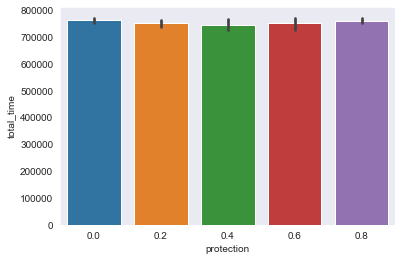

In [64]:
sns.barplot(x="protection", y="total_time", data=df[df["cache size constraint"] == 2000].sort_values("total_size").iloc[:50])

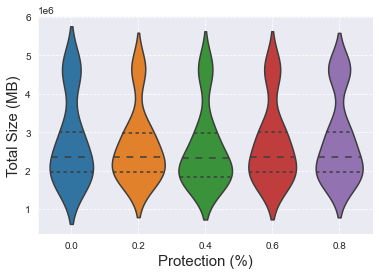

In [357]:
p = sns.violinplot(x="protection", y="total_size", data=ldf, inner="quartile", orient="v")
plt.grid(True,which="both", linestyle='--')
p.set_xlabel("Protection (%)", fontsize = 15)
p.set_ylabel("Total Size (MB)", fontsize = 15)

plt.savefig('demo.png', transparent=True, bbox_inches='tight', papertype='executive')

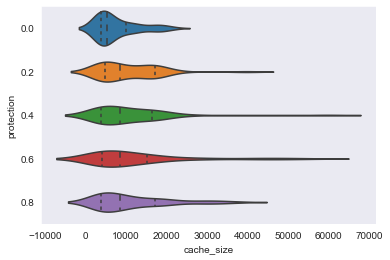

In [64]:
sns.violinplot(x="cache_size", y="protection", data=ldf, inner="quartile", orient="h")

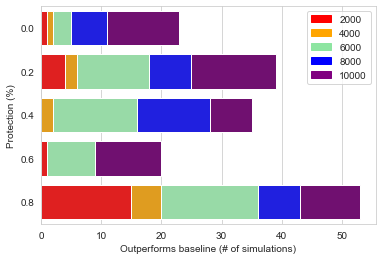

In [379]:
to_beat = {2000: 4647902.536, 4000: 2977294.9, 6000: 2342007.376, 8000: 1966524.572, 10000: 1699304.932}

# {deep, muted, pastel, dark, bright, colorblind}
colours = ["purple", "blue", "g", "orange", "red"]
c_ind = 0
for i in [10000, 8000, 6000, 4000, 2000]:
    scoring = {0.0: 0, 0.2: 0, 0.4: 0, 0.6: 0, 0.8: 0}
    for index, row in df[df["cache size constraint"] <= i].iterrows():
        limiter = to_beat[row["cache size constraint"]]
        protecc = row["protection"]
        if row["total_size"] < limiter:
            scoring[protecc] += 1
    
    sns.barplot(y=list(scoring.keys()), x=list(scoring.values()), label=i, color=colours[c_ind], orient="h")
    c_ind += 1
        
plt.xlabel("Outperforms baseline (# of simulations)")   
plt.ylabel("Protection (%)")

b1 = mpatches.Patch(color='red', label='2000')
b2 = mpatches.Patch(color='orange', label='4000')
b3 = mpatches.Patch(color='g', label='6000')
b4 = mpatches.Patch(color='blue', label='8000')
b5 = mpatches.Patch(color='purple', label='10000')
plt.legend(handles=[b1, b2, b3, b4, b5])

plt.savefig('demo.png', transparent=True, bbox_inches='tight', papertype='executive')     

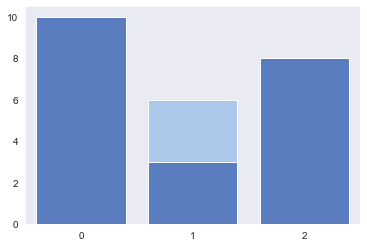

In [210]:
sns.set_color_codes("pastel")
sns.barplot(x=[0,1,2], y=[5,6,7], 
            label="Total", color="b")

sns.set_color_codes("muted")
sns.barplot(x=[0,1,2], y=[10,3,8], 
            label="Total", color="b")